In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = dataset.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], X_train.shape[2],3)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],3)

In [4]:

model = tf.keras.models.Sequential([                             
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                      
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(100, activation='softmax'),
])
     

In [5]:
model.compile( optimizer=tf.keras.optimizers.Adam(),
               loss=tf.keras.losses.sparse_categorical_crossentropy,
               metrics=['accuracy'])


In [8]:
model_output = model.fit(X_train, Y_train, epochs=7)


Epoch 1/7
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4463 - accuracy: 0.8467
Epoch 2/7
1563/1563 [==============================] - 36s 23ms/step - loss: 0.4069 - accuracy: 0.8602
Epoch 3/7
1563/1563 [==============================] - 37s 24ms/step - loss: 0.3778 - accuracy: 0.8698
Epoch 4/7
1563/1563 [==============================] - 37s 24ms/step - loss: 0.3473 - accuracy: 0.8810
Epoch 5/7
1563/1563 [==============================] - 37s 24ms/step - loss: 0.3215 - accuracy: 0.8907
Epoch 6/7
1563/1563 [==============================] - 38s 24ms/step - loss: 0.2980 - accuracy: 0.8987
Epoch 7/7
1563/1563 [==============================] - 38s 24ms/step - loss: 0.2843 - accuracy: 0.9039


In [9]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.4975 - accuracy: 0.6634


[1.4975494146347046, 0.6633999943733215]

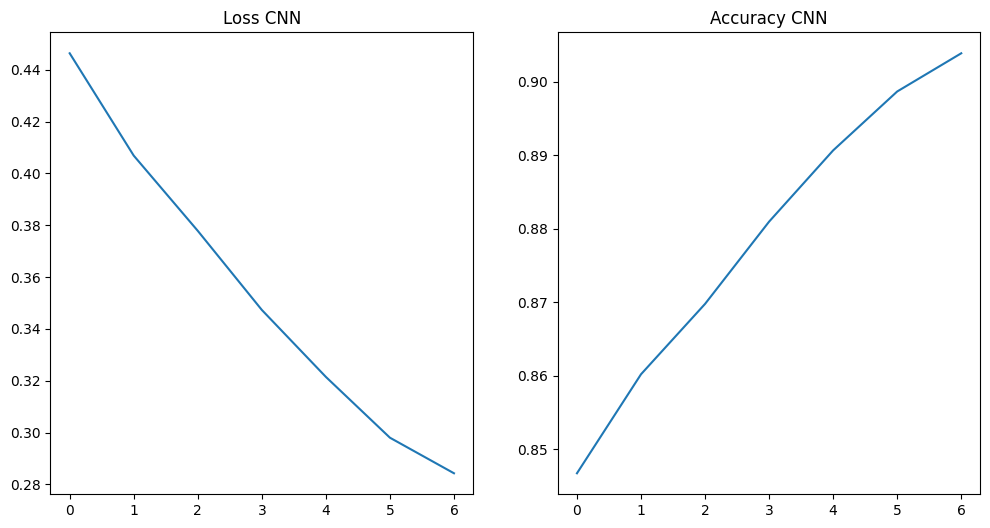

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(model_output.history['loss'])
ax1.set_title("Loss CNN")
ax2.plot(model_output.history['accuracy'])
ax2.set_title("Accuracy CNN")
plt.show()